<a href="https://colab.research.google.com/github/SERVIR/flood_mapping_intercomparison/blob/version_2/Module_2_HydroSAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The code below is adapted from jhkennedy on Github. The script can be found [here](https://github.com/HydroSAR/HydroSAR/blob/develop/notebooks/hydrosar.ipynb)

In this Notebook we will obtain radiometrically-terrain-corrected (RTC) Sentinel-1 synthetic aperture radar (SAR) images from the Alaska Satellite Facility Distributed Active Archive Center (DAAC). We will then run the HydroSAR algorithm on these images to obtain binary water maps.

# Step 1: Install Python Packages

In [2]:
!pip install boto3 hydrosar asf_tools hyp3_sdk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.5/91.5 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.2/52.2 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.2/84.2 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 20.7 MB/s eta 0:00:00
  Created wheel for pysheds: filename=pysheds-0.4-py3-none-any.whl size=90687 sha256=12fdff5d259acba6eca91a4a162ba9bb273d33c6db7bc3c2280e49f3d9bc1ca8
  Stored in directory: /root/.cache/pip/wheels/a1/71/eb/89f783658494ca6676dd77fc1b54090a1b748f0

In [2]:
#!pip install hydrosar

In [3]:
#!pip install asf_tools

In [4]:
#!pip install hyp3_sdk

# Step 2: Log in to Hyp3

While we could download Sentinel-1 RTC images from the ASF Vertex website, we can also request these images via a Python API called HYp3. HyP3 stands for the Hybrid Pluggable Processing Pipeline

In [3]:
import hyp3_sdk as sdk
from google.colab import drive
import shutil
import asf_tools
from hydrosar.water_map import make_water_map

hyp3 = sdk.HyP3(prompt=True)

NASA Earthdata Login username: maynard_maganini
NASA Earthdata Login password: ··········


# Mount Google Drive

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
ls

drive/  sample_data/


In [11]:
cd drive/

/content/drive


In [12]:
cd My Drive/Flood_Intercomparison/Case_Studies/confirmed_case_studies/chad_09_26/hydrosar

/content/drive/My Drive/Flood_Intercomparison/Case_Studies/confirmed_case_studies/chad_09_26/hydrosar


In [13]:
ls

# Step 2: Find Granule Names

1. [Click here](https://search.asf.alaska.edu/#/) to go to ASF Vertex.

2. Click the "Filters" button as shown in the image below.

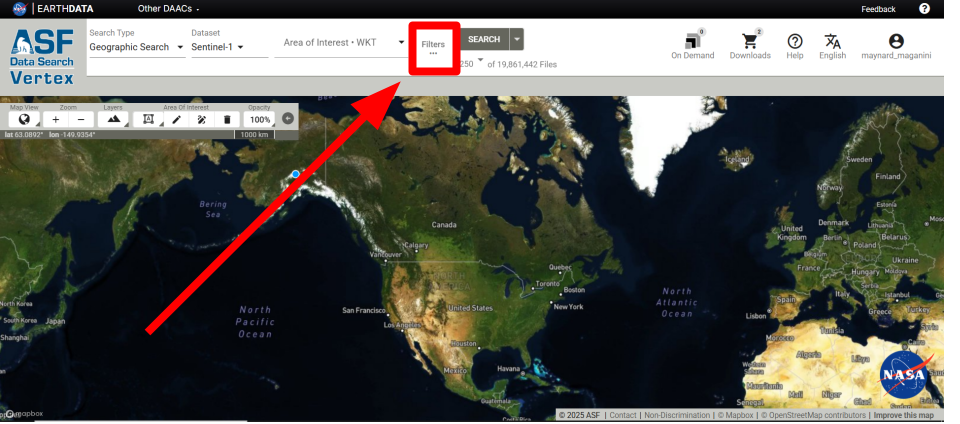

3. Click Import File as shown in the image below. Upload the GEOJSON file containing our area of interest that we exported to our Google Drive in Module_1_Script_Availability.

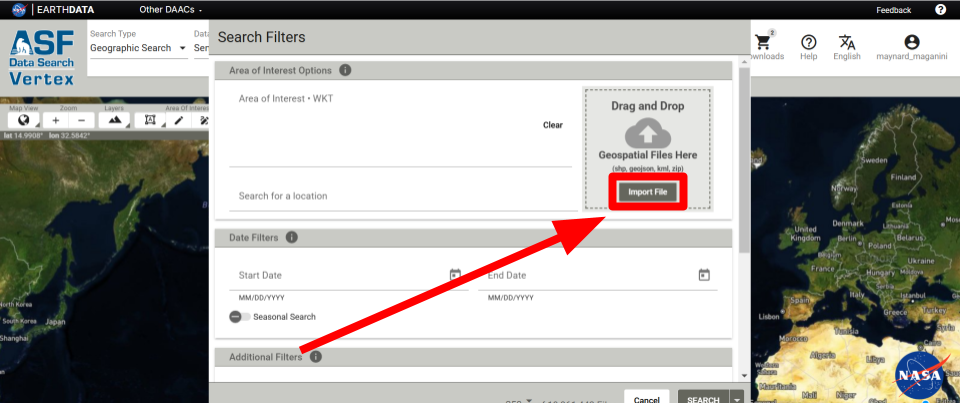

4. Click "Start Date" directly beneath the area of interest  Enter in **the date before the date of interest** in "YYYY-MM-dd" format. You can also click the calendar icon to select a date from the calendar.

5. Click "End date Date" directly beneath the area of interest  Enter in **the date of interest** in "YYYY-MM-dd" format. You can also click the calendar icon to select a date from the calendar.

6. Your screen should now look similar to the screen below. Click the search button as indicated in the image below.

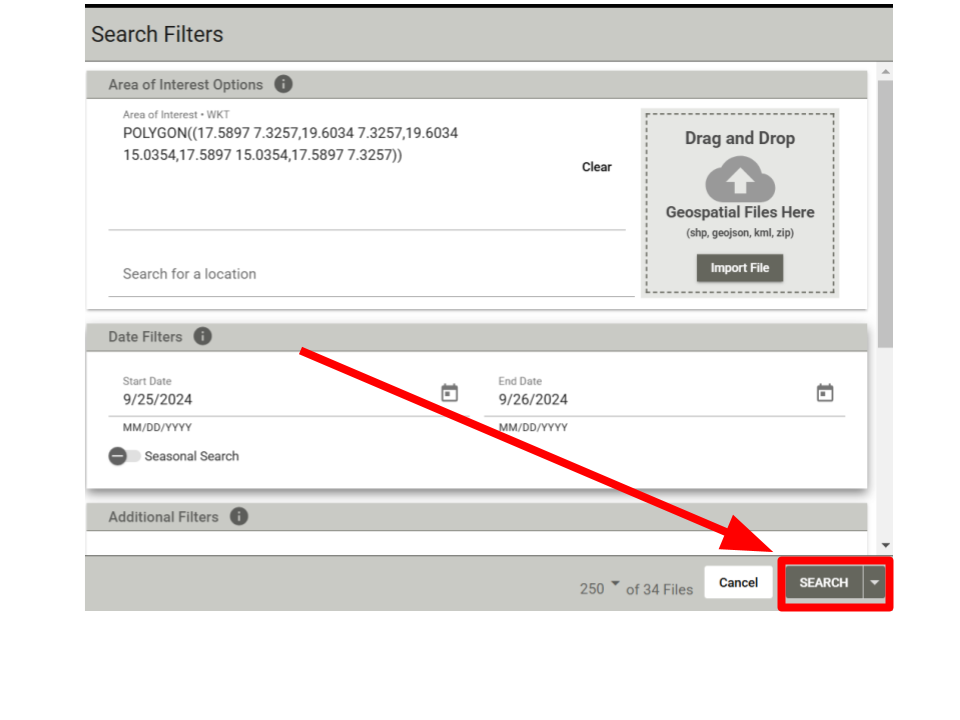

# Step 3 Run HYDRAFloods

In [14]:
granule1 = 'S1A_IW_GRDH_1SDV_20240926T043238_20240926T043303_055831_06D29D_110D'
granule2 = 'S1A_IW_GRDH_1SDV_20240926T043213_20240926T043238_055831_06D29D_FAE0'
granule3 = 'S1A_IW_GRDH_1SDV_20240926T043148_20240926T043213_055831_06D29D_D292'
granule4 = 'S1A_IW_GRDH_1SDV_20240926T043123_20240926T043148_055831_06D29D_71F2'
granule5 = 'S1A_IW_GRDH_1SDV_20240926T043058_20240926T043123_055831_06D29D_BD76'
granule6 = 'S1A_IW_GRDH_1SDV_20240926T043029_20240926T043058_055831_06D29D_19DA'

granules = [granule1, granule2, granule3, granule4, granule5, granule6]

In [15]:
job_alpha = hyp3.submit_rtc_job(
    granule1, name='water-extent-example',
    radiometry='gamma0', scale='power', resolution=30, dem_name='copernicus',
    include_dem=True, include_rgb=True,
    speckle_filter=True, dem_matching=False
)

In [16]:
job_alpha = hyp3.watch(job_alpha)

  0%|          | 0/1 [timeout in 10800 s]

In [17]:
pwd

'/content/drive/MyDrive/Flood_Intercomparison/Case_Studies/confirmed_case_studies/chad_09_26/hydrosar'

In [18]:
product_zip = job_alpha.download_files()[0]
shutil.unpack_archive(product_zip)
vv_raster = product_zip.parent / product_zip.stem / f'{product_zip.stem}_VV.tif'
vh_raster = product_zip.parent / product_zip.stem / f'{product_zip.stem}_VH.tif'
print(f'VV raster: {vv_raster}')
print(f'VH raster: {vv_raster}')

  0%|          | 0/1 [00:00<?, ?it/s]

S1A_IW_20240926T043238_DVP_RTC30_G_gpufed_4069.zip:   0%|          | 0/609721744 [00:00<?, ?it/s]

VV raster: S1A_IW_20240926T043238_DVP_RTC30_G_gpufed_4069/S1A_IW_20240926T043238_DVP_RTC30_G_gpufed_4069_VV.tif
VH raster: S1A_IW_20240926T043238_DVP_RTC30_G_gpufed_4069/S1A_IW_20240926T043238_DVP_RTC30_G_gpufed_4069_VV.tif


In [19]:
#import asf_tools

In [20]:
#from hydrosar.water_map import make_water_map

water_extent_raster_alpha = 'water_extent_alpha.tif'
make_water_map(water_extent_raster_alpha, vv_raster, vh_raster, tile_shape=(100, 100),
               max_vv_threshold=-15.5, max_vh_threshold=-23., hand_threshold=15., hand_fraction=0.8)

In [21]:
ls

S1A_IW_20240926T043238_DVP_RTC30_G_gpufed_4069/     water_extent_alpha_VH_fuzzy.tif
S1A_IW_20240926T043238_DVP_RTC30_G_gpufed_4069.zip  water_extent_alpha_VH_initial.tif
water_extent_alpha_HAND.tif                         water_extent_alpha_VV_fuzzy.tif
water_extent_alpha.tif                              water_extent_alpha_VV_initial.tif


# Beta

In [22]:
job_beta = hyp3.submit_rtc_job(
    granule2, name='water-extent-beta',
    radiometry='gamma0', scale='power', resolution=30, dem_name='copernicus',
    include_dem=True, include_rgb=True,
    speckle_filter=True, dem_matching=False
)

In [23]:
job_beta = hyp3.watch(job_beta)

  0%|          | 0/1 [timeout in 10800 s]

In [24]:
product_zip_beta = job_beta.download_files()[0]
shutil.unpack_archive(product_zip_beta)
vv_raster_beta = product_zip_beta.parent / product_zip_beta.stem / f'{product_zip_beta.stem}_VV.tif'
vh_raster_beta = product_zip_beta.parent / product_zip_beta.stem / f'{product_zip_beta.stem}_VH.tif'
print(f'VV raster: {vv_raster_beta}')
print(f'VH raster: {vv_raster_beta}')

  0%|          | 0/1 [00:00<?, ?it/s]

S1A_IW_20240926T043213_DVP_RTC30_G_gpufed_25E1.zip:   0%|          | 0/595602898 [00:00<?, ?it/s]

VV raster: S1A_IW_20240926T043213_DVP_RTC30_G_gpufed_25E1/S1A_IW_20240926T043213_DVP_RTC30_G_gpufed_25E1_VV.tif
VH raster: S1A_IW_20240926T043213_DVP_RTC30_G_gpufed_25E1/S1A_IW_20240926T043213_DVP_RTC30_G_gpufed_25E1_VV.tif


In [25]:
water_extent_raster_beta= 'water_extent_beta.tif'
make_water_map(water_extent_raster_beta, vv_raster_beta, vh_raster_beta, tile_shape=(100, 100),
               max_vv_threshold=-15.5, max_vh_threshold=-23., hand_threshold=15., hand_fraction=0.8)

# GAMMA

In [26]:
job_gamma = hyp3.submit_rtc_job(
    granule3, name='water-extent-gamma',
    radiometry='gamma0', scale='power', resolution=30, dem_name='copernicus',
    include_dem=True, include_rgb=True,
    speckle_filter=True, dem_matching=False
)

In [ ]:
job_gamma = hyp3.watch(job_gamma)

  0%|          | 0/1 [timeout in 10800 s]

In [ ]:
product_zip_gamma = job_gamma.download_files()[0]
shutil.unpack_archive(product_zip_gamma)
vv_raster_gamma = product_zip_gamma.parent / product_zip_gamma.stem / f'{product_zip_gamma.stem}_VV.tif'
vh_raster_gamma = product_zip_gamma.parent / product_zip_gamma.stem / f'{product_zip_gamma.stem}_VH.tif'
print(f'VV raster: {vv_raster_gamma}')
print(f'VH raster: {vv_raster_gamma}')

In [ ]:
water_extent_raster_gamma= 'water_extent_gamma.tif'
make_water_map(water_extent_raster_gamma, vv_raster_gamma, vh_raster_gamma, tile_shape=(100, 100),
               max_vv_threshold=-15.5, max_vh_threshold=-23., hand_threshold=15., hand_fraction=0.8)

#DELTA

In [ ]:
job_pt4 = hyp3.submit_rtc_job(
    granule4, name='water-extent-pt4',
    radiometry='gamma0', scale='power', resolution=30, dem_name='copernicus',
    include_dem=True, include_rgb=True,
    speckle_filter=True, dem_matching=False
)

In [ ]:
job_pt4 = hyp3.watch(job_pt4)

In [ ]:
product_zip_pt4 = job_pt4.download_files()[0]
shutil.unpack_archive(product_zip_pt4)
vv_raster_pt4 = product_zip_pt4.parent / product_zip_pt4.stem / f'{product_zip_pt4.stem}_VV.tif'
vh_raster_pt4 = product_zip_pt4.parent / product_zip_pt4.stem / f'{product_zip_pt4.stem}_VH.tif'
print(f'VV raster: {vv_raster_pt4}')
print(f'VH raster: {vv_raster_pt4}')

In [ ]:
water_extent_raster_pt4= 'water_extent_pt4.tif'
make_water_map(water_extent_raster_pt4, vv_raster_pt4, vh_raster_pt4, tile_shape=(100, 100),
               max_vv_threshold=-15.5, max_vh_threshold=-23., hand_threshold=15., hand_fraction=0.8)

# EPSILON

In [ ]:
job_pt5 = hyp3.submit_rtc_job(
    granule5, name='water-extent-pt5',
    radiometry='gamma0', scale='power', resolution=30, dem_name='copernicus',
    include_dem=True, include_rgb=True,
    speckle_filter=True, dem_matching=False
)

In [ ]:
job_pt5 = hyp3.watch(job_pt5)

In [ ]:
product_zip_pt5 = job_pt5.download_files()[0]
shutil.unpack_archive(product_zip_pt5)
vv_raster_pt5 = product_zip_pt5.parent / product_zip_pt5.stem / f'{product_zip_pt5.stem}_VV.tif'
vh_raster_pt5 = product_zip_pt5.parent / product_zip_pt5.stem / f'{product_zip_pt5.stem}_VH.tif'
print(f'VV raster: {vv_raster_pt5}')
print(f'VH raster: {vv_raster_pt5}')

In [ ]:
water_extent_raster_pt5= 'water_extent_pt5.tif'
make_water_map(water_extent_raster_pt5, vv_raster_pt5, vh_raster_pt5, tile_shape=(100, 100),
               max_vv_threshold=-15.5, max_vh_threshold=-23., hand_threshold=15., hand_fraction=0.8)

# ZETA

In [ ]:
job_zeta = hyp3.submit_rtc_job(
    granule6, name='water-extent-zeta',
    radiometry='gamma0', scale='power', resolution=30, dem_name='copernicus',
    include_dem=True, include_rgb=True,
    speckle_filter=True, dem_matching=False
)

In [ ]:
job_zeta_watch = hyp3.watch(job_zeta)

In [ ]:
product_zip_zeta = job_zeta.download_files()[0]
shutil.unpack_archive(product_zip_zeta)
vv_raster_zeta = product_zip_zeta.parent / product_zip_zeta.stem / f'{product_zip_zeta.stem}_VV.tif'
vh_raster_zeta = product_zip_zeta.parent / product_zip_zeta.stem / f'{product_zip_zeta.stem}_VH.tif'
print(f'VV raster: {vv_raster_zeta}')
print(f'VH raster: {vv_raster_zeta}')

In [ ]:
water_extent_raster_zeta = 'water_extent_pt6.tif'
make_water_map(water_extent_raster_zeta, vv_raster_zeta, vh_raster_zeta, tile_shape=(100, 100),
               max_vv_threshold=-15.5, max_vh_threshold=-23., hand_threshold=15., hand_fraction=0.8)

# Looped Example

In [ ]:
cd looptest

[Errno 2] No such file or directory: 'looptest'
/content/drive/MyDrive/flood_mapping_intercomparison/hydrosar/looptest


In [ ]:
pwd

'/content/drive/My Drive/flood_mapping_intercomparison/hydrosar/looptest'

In [ ]:
import time

In [ ]:
granule1 = 'S1A_IW_GRDH_1SDV_20230616T010907_20230616T010932_049004_05E498_9B24'
granule2 = 'S1A_IW_GRDH_1SDV_20230616T010842_20230616T010907_049004_05E498_57EA'
granule3 = 'S1A_IW_GRDH_1SDV_20230616T010817_20230616T010842_049004_05E498_018B'
granule4 = 'S1A_IW_GRDH_1SDV_20230616T010817_20230616T010842_049004_05E498_018B'
granule5 = 'S1A_IW_GRDH_1SDV_20230616T010727_20230616T010752_049004_05E498_8BA8'

granules = [granule1, granule2, granule3, granule4, granule5]
n_granules = len(granules) # number of granules
job_name_stem = 'water-extent-pt'
raster_name_stem = 'water_extent_pt'

for k in range(n_granules):
  k += 1
  job_name = job_name_stem + str(k)
  print(job_name)
  raster_name = raster_name_stem + str(k)
  print(raster_name)

  # submit job to HyP3
  job = hyp3.submit_rtc_job(
    granules[k], name= job_name,
    radiometry='gamma0', scale='power', resolution=30, dem_name='copernicus',
    include_dem=True, include_rgb=True,
    speckle_filter=True, dem_matching=False
  )

  time.sleep(3000)
  # Unzip Files
  product_zip = job.download_files()[0]
  shutil.unpack_archive(product_zip)
  vv_raster = product_zip.parent / product_zip.stem / f'{product_zip.stem}_VV.tif'
  vh_raster = product_zip.parent / product_zip.stem / f'{product_zip.stem}_VH.tif'
  print(f'VV raster: {vv_raster}')
  print(f'VH raster: {vv_raster}')

  # Make Water Map
  make_water_map(raster_name, vv_raster_pt4, vh_raster_pt4, tile_shape=(100, 100),
                 max_vv_threshold=-15.5, max_vh_threshold=-23., hand_threshold=15., hand_fraction=0.8)




water-extent-pt1
water_extent_pt1


  0%|          | 0/1 [00:00<?, ?it/s]

IndexError: list index out of range

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pwd

'/content'

In [ ]:
ls

drive/                                              water_extent_alpha.tif
S1A_IW_20230616T010907_DVP_RTC30_G_gpufed_9323/     water_extent_alpha_VH_fuzzy.tif
S1A_IW_20230616T010907_DVP_RTC30_G_gpufed_9323.zip  water_extent_alpha_VH_initial.tif
sample_data/                                        water_extent_alpha_VV_fuzzy.tif
water_extent_alpha_HAND.tif                         water_extent_alpha_VV_initial.tif


In [ ]:
cd drive/

/content/drive


In [ ]:
ls

MyDrive/  Shareddrives/


In [ ]:
cd MyDrive

/content/drive/MyDrive


In [ ]:
cd flood_mapping_intercomparison/hydrosar

/content/drive/MyDrive/flood_mapping_intercomparison/hydrosar


# Looped example

In [ ]:
jobs = []
count = 1
for i in granules:
  variable = hyp3.submit_rtc_job(
      i, name = 'water-extent-example',
      radiometry='gamma0', scale='power', resolution=30, dem_name='copernicus',
      include_dem=True, include_rgb=True,
      speckle_filter=True, dem_matching=False
  )
  jobs.append(variable)

In [ ]:
for j in jobs:
  hyp3.watch(j)

  0%|          | 0/1 [timeout in 10800 s]

  0%|          | 0/1 [timeout in 10800 s]

  0%|          | 0/1 [timeout in 10800 s]

  0%|          | 0/1 [timeout in 10800 s]

  0%|          | 0/1 [timeout in 10800 s]

In [ ]:
import shutil

for k in jobs:
  product_zip = k.download_files()[0]
  shutil.unpack_archive(product_zip)
  vv_raster = product_zip.parent / product_zip.stem / f'{product_zip.stem}_VV.tif'
  vh_raster = product_zip.parent / product_zip.stem / f'{product_zip.stem}_VH.tif'
  print(f'VV raster: {vv_raster}')
  print(f'VH raster: {vv_raster}')

In [ ]:
import shutil

product_zip = job.download_files()[0]
shutil.unpack_archive(product_zip)
vv_raster = product_zip.parent / product_zip.stem / f'{product_zip.stem}_VV.tif'
vh_raster = product_zip.parent / product_zip.stem / f'{product_zip.stem}_VH.tif'
print(f'VV raster: {vv_raster}')
print(f'VH raster: {vv_raster}')

In [ ]:
from hydrosar.water_map import make_water_map

In [ ]:
joba = hyp3.submit_rtc_job(
    granny1, name='water-extent-example',
    radiometry='gamma0', scale='power', resolution=30, dem_name='copernicus',
    include_dem=True, include_rgb=True,
    speckle_filter=True, dem_matching=False
)
print(joba)

1 HyP3 Jobs: 0 succeeded, 0 failed, 0 running, 1 pending.


In [ ]:
jobb = hyp3.submit_rtc_job(
    granny2, name='water-extent-example',
    radiometry='gamma0', scale='power', resolution=30, dem_name='copernicus',
    include_dem=True, include_rgb=True,
    speckle_filter=True, dem_matching=False
)
print(jobb)

1 HyP3 Jobs: 0 succeeded, 0 failed, 0 running, 1 pending.


In [ ]:
jobc = hyp3.submit_rtc_job(
    granny3, name='water-extent-example',
    radiometry='gamma0', scale='power', resolution=30, dem_name='copernicus',
    include_dem=True, include_rgb=True,
    speckle_filter=True, dem_matching=False
)
print(jobc)

1 HyP3 Jobs: 0 succeeded, 0 failed, 0 running, 1 pending.


In [ ]:
jobd = hyp3.submit_rtc_job(
    granny4, name='water-extent-example',
    radiometry='gamma0', scale='power', resolution=30, dem_name='copernicus',
    include_dem=True, include_rgb=True,
    speckle_filter=True, dem_matching=False
)
print(jobd)

1 HyP3 Jobs: 0 succeeded, 0 failed, 0 running, 1 pending.


In [ ]:
jobe = hyp3.submit_rtc_job(
    granny5, name='water-extent-example',
    radiometry='gamma0', scale='power', resolution=30, dem_name='copernicus',
    include_dem=True, include_rgb=True,
    speckle_filter=True, dem_matching=False
)
print(jobe)

1 HyP3 Jobs: 0 succeeded, 0 failed, 0 running, 1 pending.


In [ ]:
joba = hyp3.watch(joba)
jobb = hyp3.watch(jobb)
jobc = hyp3.watch(jobc)
jobd = hyp3.watch(jobd)
jobe = hyp3.watch(jobe)

  0%|          | 0/1 [timeout in 10800 s]

  0%|          | 0/1 [timeout in 10800 s]

  0%|          | 0/1 [timeout in 10800 s]

  0%|          | 0/1 [timeout in 10800 s]

  0%|          | 0/1 [timeout in 10800 s]

In [ ]:
import shutil

product_zip = job.download_files()[0]
shutil.unpack_archive(product_zip)
vv_raster = product_zip.parent / product_zip.stem / f'{product_zip.stem}_VV.tif'
vh_raster = product_zip.parent / product_zip.stem / f'{product_zip.stem}_VH.tif'
print(f'VV raster: {vv_raster}')
print(f'VH raster: {vv_raster}')

NameError: name 'job' is not defined